In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('fd01-sample1.csv')

x_train, x_test = train_test_split(df, test_size=0.2)
print(x_train.shape, x_test.shape)

(800, 30) (200, 30)


[[ 4.15738487 -0.10229547  0.20325664 -0.21002562  0.66686704  0.0524214
  -0.2011205  -0.03351489 -0.1590285  -0.13807072 -0.33642445  0.35767608
  -0.41139633 -0.08934018 -0.70976951 -0.05012639 -0.2647422  -0.11407253
  -0.01112815 -0.03491596  0.06311282  0.15974877  0.11396441 -0.01592089
  -0.01412597  0.07122684 -0.03492309 -0.00553936  0.11362709  0.11995951]]
[[106   0]
 [  0  94]]


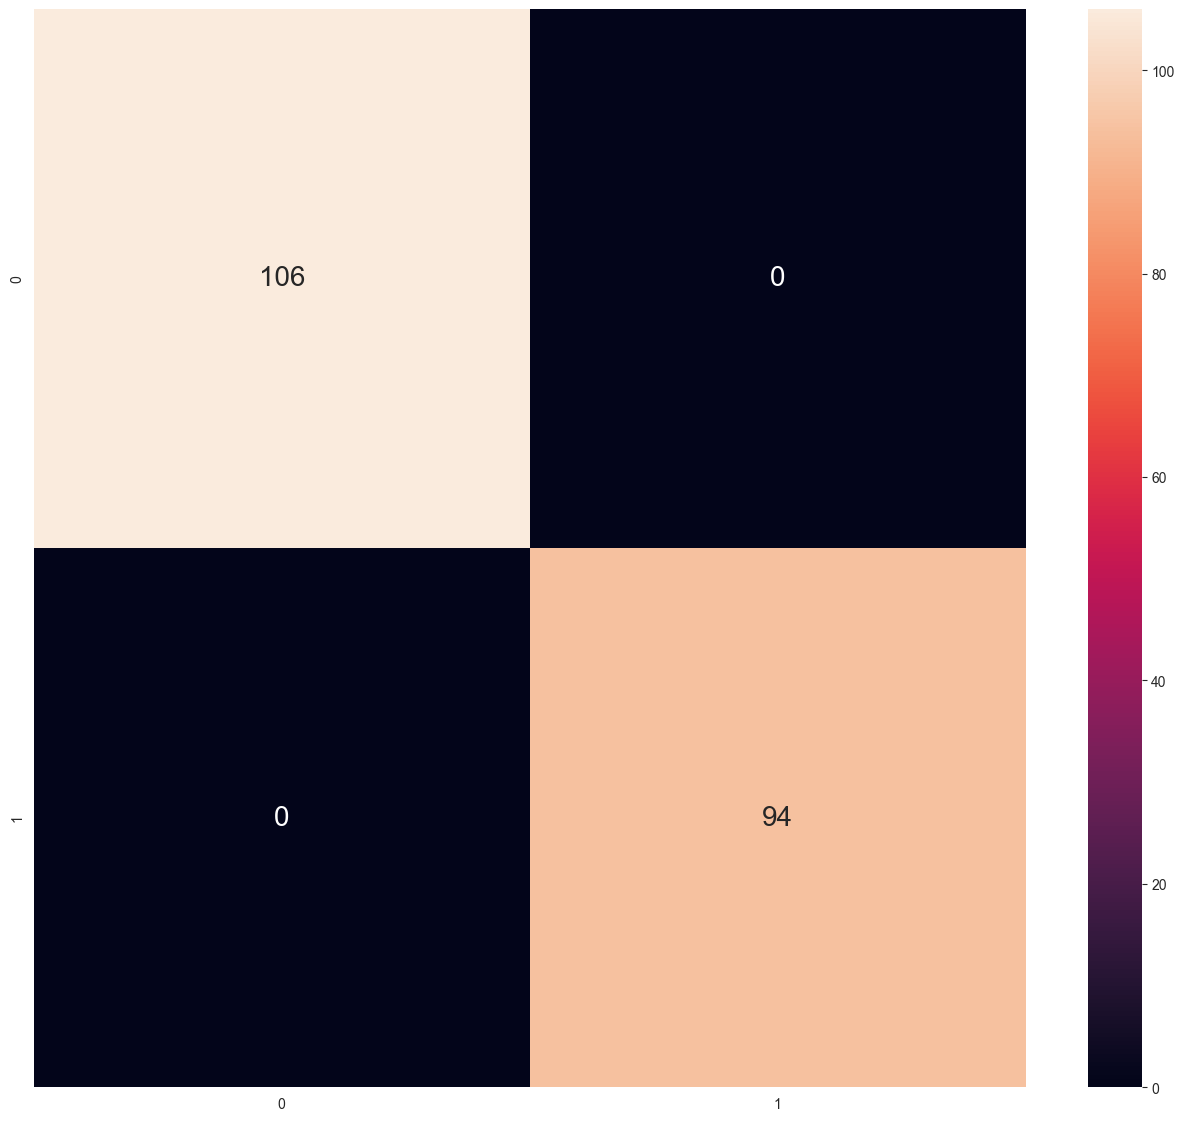

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import numpy as np

# The following 2 scalers(MinMaxScaler and StandardScaler) both work with the same accuracy
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x_train)
# xt = scaler.transform(x_test)
scaler = StandardScaler()
x = scaler.fit_transform(x_train)
xt = scaler.transform(x_test)
# x = preprocessing.normalize(x_train)
# xt = preprocessing.normalize(x_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x, x_train.Class)
print(model.coef_)
y = model.predict(xt)

# import seaborn as sns
# sns.catplot(x=x[:, 0], y=model.labels_)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(x_test.iloc[:, 0], np.where(y > 0.5, 1, 0))
print(cm)
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 20})

plt.show()